# The Objectives:

1. Difference between Bagging and Boosting.
2. Random Forest
3. AdaBoost
4. Gradiant Boosting

# [Difference between Bagging and Boosting][1]

1. Bagging: Training a bunch of individual models in a parallel way. Each model is trained by a random subset of the data
2. Boosting: Training a bunch of individual models in a sequential way. Each individual model learns from mistakes made by the previous model.

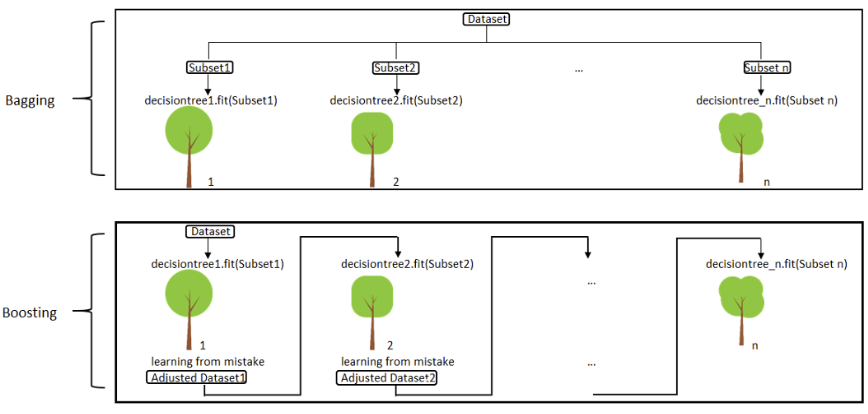


[1]:https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725


# [Random Forest(RF)][1]


RF is an ensemble approach that can be used to perform both classification and regression tasks. RF geneerates multiple decision trees such that each tree is a weak learner and then uses the votes or the averages the results to find the final prediction. It is an integration between <b> the bagging technique </b> (in which you draw boostrap samples) and <b> the subspace method </b> in which we either select a rondom number of feature subset or use any information theory method to select that subset. In each tree node, we use an inofrmation theory method to select the most inofrmative feature. 


##  RF algorithm steps

1. Draw a random bootstrap sample of the size $n$ with replacement.
2. Build a DT for each sample such that at each node:
    - 2.1) Select randomly $ f $ features without replacement.
    - 2.2) Use DT information theory metrics to split the nodes in 2.1
3. Repeat 1 and 2 number of times (which presents the # of bootstrapping samples).
4. Aggregate the results of (3) by voting described below.


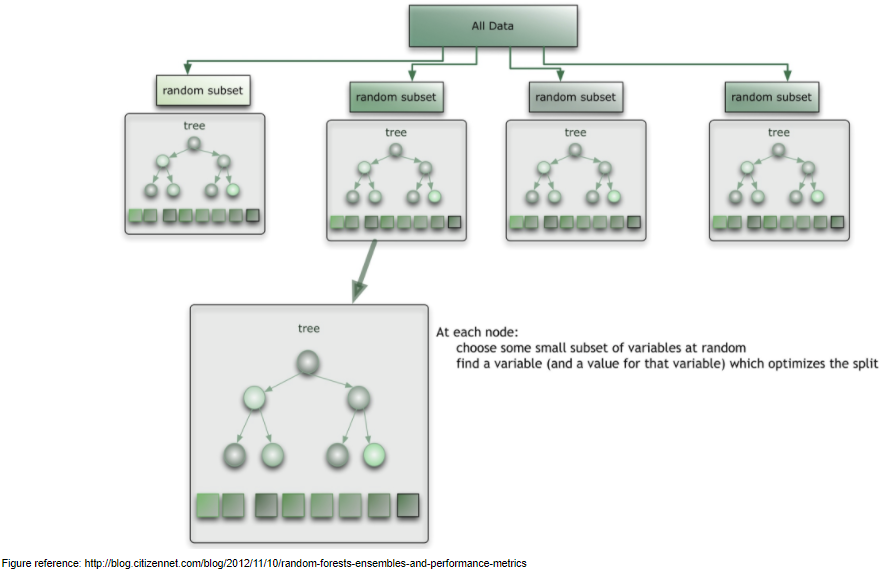

## [RF desirable characteristics][1]

1. Its accuracy is as good as Adaboost and sometimes better.
2. It's relatively robust to outliers and noise.
3. It's faster than bagging or boosting.
4. It gives useful internal estimates of error, strength, correlation and variable importance.
5. It's simple and easily parallelized.

## [RF number of trees and number of features][3]

1. The suggested number of trees are between 64 and 128 trees
2. For classification, the suggetsed number of features is $\sqrt{m}$ and for regression, is $\frac{m}{3}$
3. In all cases, we need to validate these two hyperparameters.

Read [Example][4]


[1]:https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf
[2]:https://stats.stackexchange.com/questions/36165/does-the-optimal-number-of-trees-in-a-random-forest-depend-on-the-number-of-pred/36183
[3]:https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#remarks
[4]:https://www.datascience.com/resources/notebooks/random-forest-intro

# [Random Forest by figure][1]

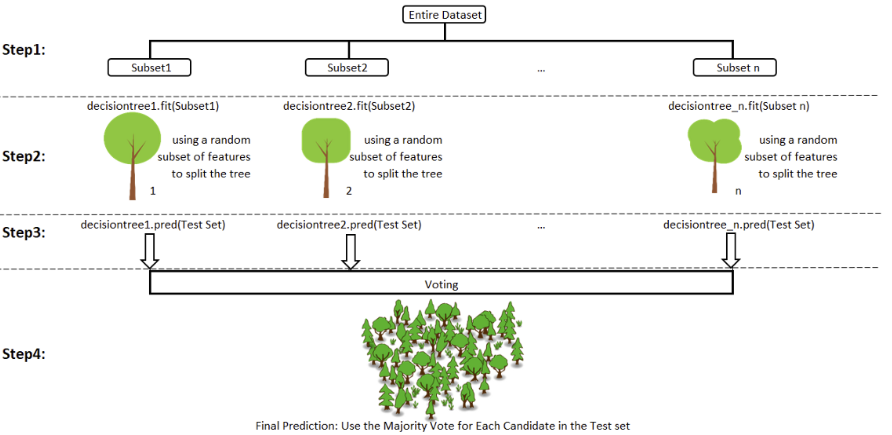


[1]:https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725


## Questions:

1. What is the difference between RF and DT? pros/cons?
2. Other questions?

## [AdaBoost agorithm][1]


<b> AdaBoost </b>, short for Adaptive Boosting, is a machine learning meta-algorithm. The aim is that each learner corrects its predessor underfitted examples. The results will make each learner focus on more harder cases.


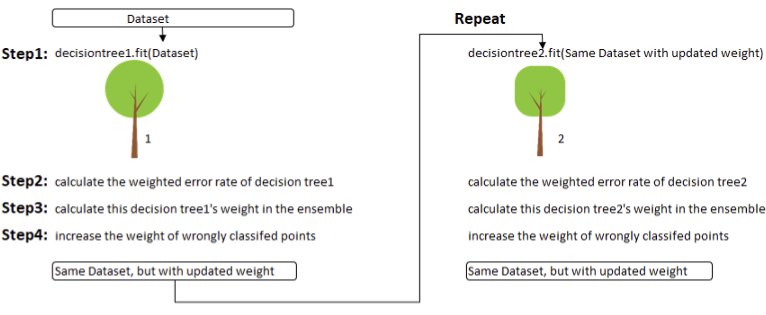

Let us go for the [example 1][1] and [example 2][2]

[1]:https://towardsdatascience.com/machine-learning-part-17-boosting-algorithms-adaboost-in-python-d00faac6c464
[2]:https://sefiks.com/2018/11/02/a-step-by-step-adaboost-example/

## [Gradiant Boosting algorithm][1]

<b> Gradient boosting </b> is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. (Wikipedia definition)

The aim is that each learner reduces its predessor residules. The results will make each learner minimizes the overall residuals. 

[1]:https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d

## Questions:

1. What are the pros and cons of decision, random forest, adaboost, and gradient boosting trees?
2. Others?

Automatically created module for IPython interactive environment


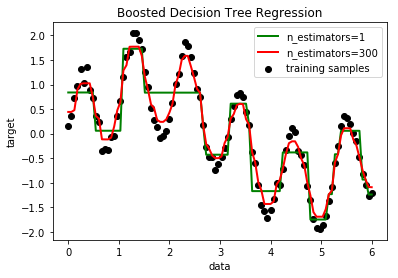

In [1]:
print(__doc__)

# Author: Noel Dawe <noel.dawe@gmail.com>
# Book 1 code
# License: BSD 3 clause

# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

%matplotlib inline

# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor 

#Dataset Boston
#https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

# #############################################################################
# Load data
boston = datasets.load_boston()
X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.80)
X_train, y_train = X[:offset], y[:offset]
X_val, y_val = X[offset:], y[offset:]

# #############################################################################


tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X_train, y_train)
y_pred = tree_reg1.predict(X_val)
print('First Iteration',np.sqrt(mean_squared_error(y_val, y_pred)))

y2 = y_train - tree_reg1.predict(X_train)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X_train, y2)
y_pred = sum(tree.predict(X_val) for tree in (tree_reg1, tree_reg2))
print('Second Iteration',np.sqrt(mean_squared_error(y_val, y_pred)))


y3 = y2 - tree_reg2.predict(X_train)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X_train, y3)
y_pred = sum(tree.predict(X_val) for tree in (tree_reg1, tree_reg2, tree_reg3))
print('Third Iteration',np.sqrt(mean_squared_error(y_val, y_pred)))  

First Iteration 5.436505215755089
Second Iteration 5.428927935378603
Third Iteration 3.817568389429188


# Codes for classifiers

See the book and sklearn help.<br/> <Br/>
<b> Be careful all ensemble methods need a lot of hyperparameter tuning</b>